IMPORTING LIBRARIES

In [12]:
import pandas as pd
import numpy as np

IMPORTING CSV FILE

In [13]:
weatherAUS = pd.read_csv('weatherAUS.csv')

SELECTING FEATURES

In [14]:
features = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']

In [15]:
weatherAUS = weatherAUS.dropna(subset = features)
data = weatherAUS[features].copy()
data

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1


SCALING THE DATA

In [16]:
data = ((data - data.min())/(data.max()-data.min()))*9 + 1
data

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,5.617577,5.015385,1.014690,3.651163,3.068966,3.482759,7.39,2.98,5.046281,5.3200,5.157044,5.02
1,4.334917,5.450549,1.000000,3.651163,1.413793,3.275862,4.96,3.25,5.477686,5.4208,5.219400,5.52
2,5.510689,5.569231,1.000000,3.790698,2.965517,3.689655,4.42,3.70,5.031405,5.5504,6.009238,5.30
3,4.719715,6.024176,1.000000,2.255814,2.137931,1.931034,5.05,2.44,6.519008,6.1408,5.406467,5.96
4,6.494062,6.874725,1.024483,3.441860,1.724138,3.068966,8.38,3.97,5.507438,5.1616,5.344111,6.60
...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.501188,4.797802,1.000000,2.744186,2.551724,2.344828,6.31,3.43,7.575207,7.3504,3.598152,4.84
145455,3.351544,5.114286,1.000000,2.744186,2.344828,2.137931,5.59,3.16,7.560331,7.2208,3.743649,5.14
145456,3.522565,5.490110,1.000000,2.116279,2.344828,1.931034,6.04,2.89,7.396694,7.0480,3.909931,5.56
145457,3.907363,5.806593,1.000000,3.162791,1.931034,1.931034,5.77,3.16,7.024793,6.7168,4.242494,5.88


GENERATING RANDOM CENTROID

In [27]:
def random_centroids(data, k):
    centroids = []
    for i in range (k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis = 1)

GETTING LABELS

In [28]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis =1)))
    return distances.idxmin(axis = 1)

In [29]:
labels = get_labels(data, centroids)

In [30]:
labels.value_counts()

1    66823
0    19051
2    17969
3     8999
4     7539
Name: count, dtype: int64

UPDATED CENTROIDS

In [31]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

PCA

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [33]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components = 2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.fit_transform(centroids.T)
    clear_output(wait = True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x = data_2d[:,0], y = data_2d[:,1], c = labels)
    plt.scatter(x = centroids_2d[:,0], y = centroids_2d[:,1])
    plt.show()

CLUSTERING

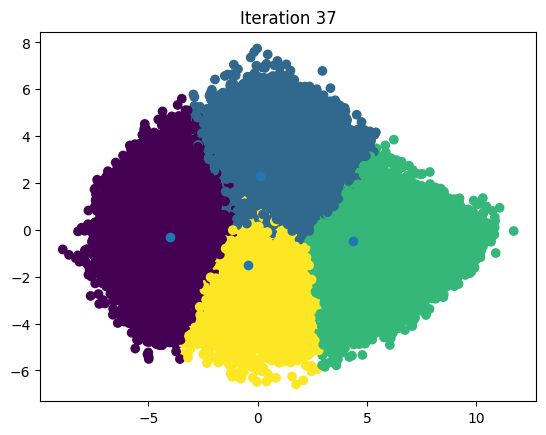

In [34]:
max_iterations = 100
k = 4

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration+=1

In [35]:
centroids

,0,1,2,3
MinTemp,4.153550,6.617287,6.284401,4.639873
MaxTemp,3.625368,5.743114,7.061043,4.772277
Rainfall,1.065910,1.078515,1.004038,1.014838
WindGustSpeed,2.977639,3.370907,3.617566,3.251547
WindSpeed9am,2.084295,2.383360,2.598724,2.379931
WindSpeed3pm,2.618471,3.068573,2.879377,2.829397
Humidity9am,8.598479,7.482538,4.539792,6.347294
Humidity3pm,6.745214,6.508584,2.872913,4.423969
Pressure9am,6.861525,5.963358,5.975164,6.809980
Pressure3pm,6.913244,5.964015,5.827023,6.754176
